<a href="https://colab.research.google.com/github/fernxndess/eu-facul/blob/main/8puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iniciei o trabalho implementando o método BFS. Como base usei os pseudocódigos dos slides dados em aula e para ajudar-me utilizei a ferramenta ChatGPT.**






In [3]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def bfs(puzzle_inicial):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    fila = deque()
    fila.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while fila:
        max_fringe_size = max(max_fringe_size, len(fila))
        estado, caminho, profundidade = fila.popleft()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(fila),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8),
                # "max_ram_usage": round(psutil.Process().memory_info().rss / 1024.0 / 1024.0, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        zero_idx = estado.index(0)
        for move in get_posicoes_vizinhas(zero_idx):
            novo_estado = mover(estado, move)
            nova_acao = MOVES[move]
            fila.append((novo_estado, caminho + [nova_acao], profundidade + 1))
            max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0

puzzle = (1, 2, 3, 4, 5, 6, 0, 7, 8)

if eh_soluvel(puzzle):
    resultado = bfs(puzzle)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada.")
else:
    print("Este puzzle não é solucionável.")


path_to_goal: ['Right', 'Right']
cost_of_path: 2
nodes_expanded: 6
fringe_size: 10
max_fringe_size: 12
search_depth: 2
max_search_depth: 3
running_time: 0.00012617


**Esse foi o meu primeiro código e nessa primeira rodada de teste, utilizei a sequência (1, 2, 3, 4, 5, 6, 0, 7, 8) para o puzzle. Como essa foi minha primeira tentativa, tive algumas complicações. Note que a linha cujo daria a saída acerca da memória RAM no def bfs(puzzle_inicial) está com a # de comentário. Isso se deu pois, como estou utilizando uma versão lite do jupyter notebook, não consigo ter acesso a pacotes externos via !pip, logo não posso acessar recursos do sistema operacional como memória (psutil, resource, etc).**

**Depois dessa primeira tentativa, consegui esse cógido atualizado:**

In [4]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def bfs(puzzle_inicial):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    fila = deque()
    fila.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while fila:
        max_fringe_size = max(max_fringe_size, len(fila))
        estado, caminho, profundidade = fila.popleft()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(fila),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        zero_idx = estado.index(0)
        for move in get_posicoes_vizinhas(zero_idx):
            novo_estado = mover(estado, move)
            nova_acao = MOVES[move]
            fila.append((novo_estado, caminho + [nova_acao], profundidade + 1))
            max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0

puzzle = (1, 2, 3, 4, 5, 6, 0, 7, 8)

if eh_soluvel(puzzle):
    resultado = bfs(puzzle)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada.")
else:
    print("Este puzzle não é solucionável.")


path_to_goal: ['Right', 'Right']
cost_of_path: 2
nodes_expanded: 6
fringe_size: 10
max_fringe_size: 12
search_depth: 2
max_search_depth: 3
running_time: 7.208e-05


**Testei novamente usando a sequência (1, 2, 3, 4, 5, 6, 0, 7, 8) para o puzzle e agora deu certo.**

**Agora explicarei célula por célula do código.**

**1 - Importações:**

In [5]:
import time
from collections import deque

**time: usado para medir quanto tempo o algoritmo leva para encontrar a solução.**

**deque: estrutura de fila eficiente da biblioteca collections, ideal para algoritmos de busca como BFS.**

**2 -  Dicionário de movimentos possíveis:**

In [6]:
MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

**Define os movimentos possíveis no tabuleiro 3x3. -3 e +3 movem o espaço vazio (0) para cima ou para baixo (respectivamente), e -1 e +1 movem para esquerda ou direita.**

**3 - Função get_posicoes_vizinhas(index):**

In [7]:
def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

**Dado o índice do número 0 (espaço vazio), retorna os movimentos válidos (evita sair do tabuleiro). Por exemplo, se 0 está na primeira linha, não pode ir para cima.**

**4 - Função mover(puzzle, move):**

In [8]:
def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

**Realiza uma cópia do estado atual do puzzle. Troca a posição do 0 com a posição indicada pelo movimento. Retorna o novo estado após o movimento.**

**5 - Função principal bfs(puzzle_inicial):**

In [9]:
def bfs(puzzle_inicial):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    fila = deque()
    fila.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while fila:
        max_fringe_size = max(max_fringe_size, len(fila))
        estado, caminho, profundidade = fila.popleft()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(fila),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        zero_idx = estado.index(0)
        for move in get_posicoes_vizinhas(zero_idx):
            novo_estado = mover(estado, move)
            nova_acao = MOVES[move]
            fila.append((novo_estado, caminho + [nova_acao], profundidade + 1))
            max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

**Implementa a busca em largura (Breadth-First Search) para resolver o puzzle.**

**Etapas importantes:**

  **Inicializa fila (deque), visitados, e variáveis de estatísticas.**

   **Enquanto houver estados na fila:**
     **Remove o próximo estado (fila.popleft()).**
     **Verifica se o objetivo foi alcançado.**
     **Se não, gera os estados vizinhos com movimentos válidos e os adiciona na fila.**

   **Retorna estatísticas como:**
     **path_to_goal: sequência de movimentos até a solução**
     **cost_of_path: número de passos**
     **nodes_expanded: quantos nós foram explorados**
     **running_time: tempo de execução**

**6 - Função eh_soluvel(puzzle):**

In [10]:
def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0

puzzle = (1, 2, 3, 4, 5, 6, 0, 7, 8)

if eh_soluvel(puzzle):
    resultado = bfs(puzzle)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada.")
else:
    print("Este puzzle não é solucionável.")

path_to_goal: ['Right', 'Right']
cost_of_path: 2
nodes_expanded: 6
fringe_size: 10
max_fringe_size: 12
search_depth: 2
max_search_depth: 3
running_time: 8.803e-05


**Verifica se o puzzle é solucionável (com base na contagem de inversões).Puzzle 8-puzzle só é resolvível se o número de inversões for par.**

**7 - Execução no final do script:**

In [11]:
puzzle = (1, 2, 3, 4, 5, 6, 0, 7, 8)

**Define o estado inicial do puzzle. Verifica se ele é solucionável com eh_soluvel. Se for, executa a busca BFS e imprime as estatísticas.**

**Agora, voltando para o código testarei outra sequência para o puzzle.**

In [12]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def bfs(puzzle_inicial):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    fila = deque()
    fila.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while fila:
        max_fringe_size = max(max_fringe_size, len(fila))
        estado, caminho, profundidade = fila.popleft()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(fila),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        zero_idx = estado.index(0)
        for move in get_posicoes_vizinhas(zero_idx):
            novo_estado = mover(estado, move)
            nova_acao = MOVES[move]
            fila.append((novo_estado, caminho + [nova_acao], profundidade + 1))
            max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0

puzzle = (1, 3, 4, 2, 5, 6, 0, 7, 8)

if eh_soluvel(puzzle):
    resultado = bfs(puzzle)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada.")
else:
    print("Este puzzle não é solucionável.")

path_to_goal: ['Right', 'Up', 'Left', 'Up', 'Right', 'Right', 'Down', 'Left', 'Up', 'Left', 'Down', 'Right', 'Right', 'Up', 'Left', 'Down', 'Down', 'Right']
cost_of_path: 18
nodes_expanded: 24218
fringe_size: 21765
max_fringe_size: 21768
search_depth: 18
max_search_depth: 19
running_time: 0.21944453


**Agora utilizando a sequência (1, 3, 4, 2, 5, 6, 0, 7, 8) esse foi o resultado, note que os dados de saída são diferentes do último teste.**

 **Depois de implementar o BFS, agora implementei o DFS, segue o código:**


In [13]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def dfs(puzzle_inicial):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    pilha = []
    pilha.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while pilha:
        max_fringe_size = max(max_fringe_size, len(pilha))
        estado, caminho, profundidade = pilha.pop()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(pilha),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        zero_idx = estado.index(0)
        for move in reversed(get_posicoes_vizinhas(zero_idx)):
            novo_estado = mover(estado, move)
            nova_acao = MOVES[move]
            pilha.append((novo_estado, caminho + [nova_acao], profundidade + 1))
            max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0


puzzle = (1, 2, 3, 4, 5, 6, 0, 7, 8)

if eh_soluvel(puzzle):
    resultado = dfs(puzzle)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada.")
else:
    print("Este puzzle não é solucionável.")


path_to_goal: ['Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Right']
cost_of_path: 30
nodes_expanded: 30
fringe_size: 39
max_fringe_size: 42
search_depth: 30
max_search_depth: 30
running_time: 0.00017033


**Novamente como primeiro teste, usei a sequência (1, 2, 3, 4, 5, 6, 0, 7, 8) e obtive esse resultado acima. Note que essa saída foi diferente da saída do código implementado BFS, agora tivemos muito mais movimentos para chegar no resultado final que é a sequência (1, 2, 3, 4, 5, 6, 7, 8, 0).**

**Agora, explicando célula por célula, desconsiderarei as células de Importações, Dicionário de Movimentos, Checar vizinhos, Mover e Verificação de Solubilidade, já que são as mesmas do código implementando BFS e explicarei somente a célula acerca do DFS.**

 **Função dfs(puzzle_inicial):**

**Objetivo e cronômetro:**

In [ ]:
objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
start_time = time.process_time()

**Define o estado final que representa a solução do puzzle.**
**Inicia a contagem do tempo para medir quanto tempo o algoritmo leva para encontrar a solução.**

**Estrutura da pilha e variáveis de estatísticas:**

In [ ]:
pilha = []
pilha.append((puzzle_inicial, [], 0))
visitados = set()

**Inicializa uma pilha com o estado inicial, o caminho feito até ali (vazio), e a profundidade (0).**
**"visitados" é um set para evitar estados repetidos.**

**Inicialização de estatísticas:**

In [ ]:
nodes_expanded = 0
max_fringe_size = 0
max_depth = 0

**Estas variáveis guardam estatísticas úteis:**

**nodes_expanded: quantos nós foram explorados.**
**max_fringe_size: maior número de elementos na pilha durante a execução.**
**max_depth: maior profundidade atingida.**

**Loop principal da DFS:**

In [ ]:
while pilha:

Enquanto a pilha tiver elementos, o algoritmo continua.

**Pega o último estado da pilha (DFS é LIFO):**

In [ ]:
max_fringe_size = max(max_fringe_size, len(pilha))
estado, caminho, profundidade = pilha.pop()

**Atualiza o tamanho máximo da pilha.**
**Pega o último estado adicionado (típico da busca em profundidade).**

**Verifica se encontrou a solução:**

In [ ]:
if estado == objetivo:
    end_time = time.process_time()
    return {
        "path_to_goal": caminho,
        "cost_of_path": len(caminho),
        "nodes_expanded": nodes_expanded,
        "fringe_size": len(pilha),
        "max_fringe_size": max_fringe_size,
        "search_depth": profundidade,
        "max_search_depth": max_depth,
        "running_time": round(end_time - start_time, 8)
    }

**Se o estado atual é o objetivo, para a execução e retorna todas as estatísticas calculadas até aqui.**

**Ignora estados já visitados:**

In [ ]:
if estado in visitados:
        continue
    visitados.add(estado)

**Evita ciclos e repetições ao verificar se o estado já foi visitado.**

**Gera novos estados a partir de movimentos possíveis:**

In [ ]:
zero_idx = estado.index(0)
    for move in reversed(get_posicoes_vizinhas(zero_idx)):
        novo_estado = mover(estado, move)
        nova_acao = MOVES[move]
        pilha.append((novo_estado, caminho + [nova_acao], profundidade + 1))
        max_depth = max(max_depth, profundidade + 1)

**Pega a posição do zero. Para cada movimento válido, gera o novo estado e o adiciona na pilha.** **Usa reversed para manter a ordem de expansão consistente com a BFS (opcional). Atualiza a profundidade máxima se necessário.**

**Atualiza número de nós expandidos:**

In [ ]:
nodes_expanded += 1

**Conta mais um nó explorado.**

**Se esgotar a pilha sem achar solução:**

In [ ]:
return None

**Retorna "None" se nenhum caminho levar à solução (teoricamente não deve acontecer se o puzzle for solucionável).**

**OBS: A explicação da função está nessa estrutura: (Descrição do comando - Código - Explicação), ou seja terá uma linha de comentário, uma linha de código e por último outra linha de comentário para cada explicação.**

**Voltando ao código, rodarei mais uma vez porém agora utilizando outras sequências.**

In [ ]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def dfs(puzzle_inicial):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    pilha = []
    pilha.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while pilha:
        max_fringe_size = max(max_fringe_size, len(pilha))
        estado, caminho, profundidade = pilha.pop()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(pilha),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        zero_idx = estado.index(0)
        for move in reversed(get_posicoes_vizinhas(zero_idx)):
            novo_estado = mover(estado, move)
            nova_acao = MOVES[move]
            pilha.append((novo_estado, caminho + [nova_acao], profundidade + 1))
            max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0


puzzle =  (1, 2, 3, 6, 5, 4, 0, 8, 7)

if eh_soluvel(puzzle):
    resultado = dfs(puzzle)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada.")
else:
    print("Este puzzle não é solucionável.")

**OBS: Antes de vir para o colab e passar o trabalho a limpo, fiz tudo no jupyter notebook lite. Lá, quando tentei rodar esse código, recebi um aviso de erro de memória. Segue o Print:**

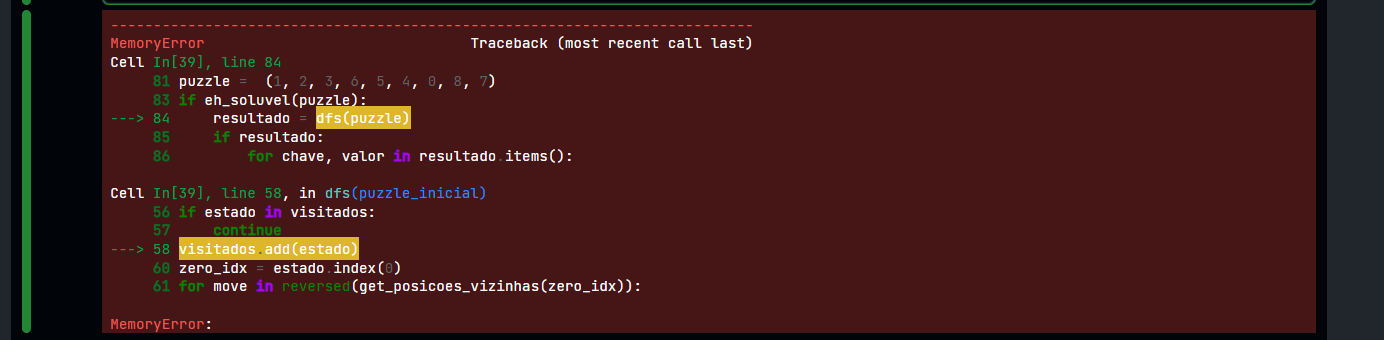

**Após tentar algumas sequências, obtive essa resposta de erro (MemoryError) e fui procurar o motivo. Acabei descobrindo que isso geralmente acontece porque a busca em profundidade (DFS) está explorando muitos nós, especialmente se o puzzle for difícil ou estiver perto de uma configuração sem solução rápida, ou sejá o DFS pode estar explorando caminhos longos demais, acumulando muitos estados na memória. Para isso adicionarei um limite de profundidade no código e tentar rodar-lo novamente.**

In [1]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def dfs(puzzle_inicial, limite_profundidade=20):
    objetivo = (1, 2, 3, 4, 5, 6, 7, 8, 0)
    start_time = time.process_time()

    pilha = []
    pilha.append((puzzle_inicial, [], 0))
    visitados = set()

    nodes_expanded = 0
    max_fringe_size = 0
    max_depth = 0

    while pilha:
        max_fringe_size = max(max_fringe_size, len(pilha))
        estado, caminho, profundidade = pilha.pop()

        if estado == objetivo:
            end_time = time.process_time()
            return {
                "path_to_goal": caminho,
                "cost_of_path": len(caminho),
                "nodes_expanded": nodes_expanded,
                "fringe_size": len(pilha),
                "max_fringe_size": max_fringe_size,
                "search_depth": profundidade,
                "max_search_depth": max_depth,
                "running_time": round(end_time - start_time, 8)
            }

        if estado in visitados:
            continue
        visitados.add(estado)

        if profundidade < limite_profundidade:
            zero_idx = estado.index(0)
            for move in reversed(get_posicoes_vizinhas(zero_idx)):
                novo_estado = mover(estado, move)
                nova_acao = MOVES[move]
                pilha.append((novo_estado, caminho + [nova_acao], profundidade + 1))
                max_depth = max(max_depth, profundidade + 1)

        nodes_expanded += 1

    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0

puzzle = (1, 2, 3, 6, 5, 4, 0, 8, 7)

if eh_soluvel(puzzle):
    resultado = dfs(puzzle, limite_profundidade=10000)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada dentro do limite de profundidade.")
else:
    print("Este puzzle não é solucionável.")

path_to_goal: ['Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Right', 'Up', 'Up', 'Left', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Right', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Up', 'Left', 'Down', 'Down', 'Right', 'Right', 'Up', 'Up', 'Left', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Up', 'Right', 'Down', 'Down', 'Left', 'Up', 'Right', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Up', 'L

**Após aumentar o limite de profundidade para 10000, consegui rodar a sequência (1, 2, 3, 6, 5, 4, 0, 8, 7) e obtive essa saída, note que há muitos e muitos passos até chegar no objetivo final.**

**Por último, implementando o IDFS, temos esse código:**

In [2]:
import time
from collections import deque

MOVES = {
    -3: 'Up',
     3: 'Down',
    -1: 'Left',
     1: 'Right'
}

def get_posicoes_vizinhas(index):
    moves = []
    row, col = divmod(index, 3)
    if row > 0: moves.append(-3)
    if row < 2: moves.append(3)
    if col > 0: moves.append(-1)
    if col < 2: moves.append(1)
    return moves

def mover(puzzle, move):
    zero_idx = puzzle.index(0)
    swap_idx = zero_idx + move
    puzzle = list(puzzle)
    puzzle[zero_idx], puzzle[swap_idx] = puzzle[swap_idx], puzzle[zero_idx]
    return tuple(puzzle)

def idfs(puzzle_inicial, limite_max=50):
    for limite in range(limite_max + 1):
        resultado = dfs(puzzle_inicial, limite)
        if resultado:
            resultado["metodo"] = f"IDDFS até profundidade {limite}"
            return resultado
    return None

def eh_soluvel(puzzle):
    inversoes = 0
    valores = [n for n in puzzle if n != 0]
    for i in range(len(valores)):
        for j in range(i + 1, len(valores)):
            if valores[i] > valores[j]:
                inversoes += 1
    return inversoes % 2 == 0


puzzle = (1, 2, 3, 6, 5, 4, 0, 8, 7)

if eh_soluvel(puzzle):
    resultado = idfs(puzzle, limite_max=30)
    if resultado:
        for chave, valor in resultado.items():
            print(f"{chave}: {valor}")
    else:
        print("Solução não encontrada dentro do limite de profundidade.")
else:
    print("Este puzzle não é solucionável.")


path_to_goal: ['Up', 'Right', 'Right', 'Down', 'Left', 'Up', 'Left', 'Down', 'Right', 'Up', 'Right', 'Down', 'Left', 'Left', 'Up', 'Right', 'Down', 'Left', 'Up', 'Right', 'Down', 'Right', 'Up', 'Left', 'Down', 'Right']
cost_of_path: 26
nodes_expanded: 33941
fringe_size: 20
max_fringe_size: 36
search_depth: 26
max_search_depth: 26
running_time: 0.08522723
metodo: IDDFS até profundidade 26


**Agora explicando a célula IDFS:**


In [ ]:
def iddfs(puzzle_inicial, limite_max=50):

**Essa linha define a função IDFS.**
**Ela recebe dois parâmetros:**

**puzzle_inicial: o estado inicial do quebra-cabeça (tupla com os números de 0 a 8).**
**limite_max: o limite máximo de profundidade a ser testado (por padrão, 50).**

In [ ]:
for limite in range(limite_max + 1):

**Aqui, o algoritmo começa uma repetição que vai de limite = 0 até limite = limite_max. A ideia é ir aumentando a profundidade da busca DFS passo a passo.**

In [ ]:
resultado = dfs(puzzle_inicial, limite)

**A cada passo, o algoritmo executa uma busca em profundidade (dfs) com o limite atual. Ele usa a função dfs que já está definida no código, que aceita esse parâmetro de profundidade.**

In [ ]:
if resultado:
    resultado["metodo"] = f"IDFS até profundidade {limite}"
    return resultado

**Se a dfs encontrar a solução com o limite atual, o resultado é retornado imediatamente. A chave "metodo" é adicionada ao dicionário de estatísticas para indicar que foi feito com IDFS até a profundidade encontrada.**

In [ ]:
return None

**Se o loop termina sem encontrar uma solução (ou seja, nenhum dfs com profundidade de 0 até limite_max conseguiu encontrar o objetivo), a função retorna None, indicando que a busca falhou dentro do limite fornecido.**

**OBS: Diferente de como expliquei o método DFS, agora no IDFS, usei a estrutura (Código - Explicação), ou seja, tera uma célula de código e depois uma célula de comentário.**

**Conclusão: de acordo com meus estudos e de acordo com os testes, nota-se que o método IDFS é melhor se quisermos um equilíbrio entre performance e consumo de memória, especialmente em problemas como o 8-puzzle.**

**Resalva: Professor, peço desculpas por não ter, na saída dos meus códigos, o indicador de uso de memória. Quando fiz todo o trabalho, utilizei o Jupyter Notebook Lite, sem saber que tinha o Google Colab ou até mesmo uma versão melhor do Jupyter, pois não era muito familiarizado com esses tipos de ferramentas e ambientes. De qualquer forma, tentei.**